In [3]:
import math
import pandas as pd
import numpy as np
import quandl
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn import preprocessing , cross_validation, svm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import datetime

C:\Users\MohamedIsmail\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
style.use('ggplot')

In [5]:
df = quandl.get("WIKI/GOOGL")

In [6]:
df.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2004-08-19,100.01,104.06,95.96,100.335,44659000.0,0.0,1.0,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,101.01,109.08,100.50,108.310,22834300.0,0.0,1.0,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,110.76,113.48,109.05,109.400,18256100.0,0.0,1.0,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,111.24,111.60,103.57,104.870,15247300.0,0.0,1.0,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,104.76,108.00,103.88,106.000,9188600.0,0.0,1.0,52.542193,54.167209,52.100830,53.164113,9188600.0


In [7]:
df['HL_PCT']=(df['High']-df['Low'])/df['Adj. Close']*100.0
df['PCT_change']=(df['Adj. Close']-df['Open'])/df['Open']*100.0
df.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,HL_PCT,PCT_change
Date,,,,,,,,,,,,,,
2004-08-19,100.01,104.06,95.96,100.335,44659000.0,0.0,1.0,50.159839,52.191109,48.128568,50.322842,44659000.0,16.096070,-49.682190
2004-08-20,101.01,109.08,100.50,108.310,22834300.0,0.0,1.0,50.661387,54.708881,50.405597,54.322689,22834300.0,15.794505,-46.220484
2004-08-23,110.76,113.48,109.05,109.400,18256100.0,0.0,1.0,55.551482,56.915693,54.693835,54.869377,18256100.0,8.073720,-50.461018
2004-08-24,111.24,111.60,103.57,104.870,15247300.0,0.0,1.0,55.792225,55.972783,51.945350,52.597363,15247300.0,15.266925,-52.717221
2004-08-25,104.76,108.00,103.88,106.000,9188600.0,0.0,1.0,52.542193,54.167209,52.100830,53.164113,9188600.0,7.749589,-49.251515


In [8]:
df=df[['Volume','Adj. Close','HL_PCT','PCT_change']]
df.head()

,Volume,Adj. Close,HL_PCT,PCT_change
Date,,,,
2004-08-19,44659000.0,50.322842,16.096070,-49.682190
2004-08-20,22834300.0,54.322689,15.794505,-46.220484
2004-08-23,18256100.0,54.869377,8.073720,-50.461018
2004-08-24,15247300.0,52.597363,15.266925,-52.717221
2004-08-25,9188600.0,53.164113,7.749589,-49.251515


In [9]:
df.fillna(value=-99999,inplace=True)
forecast_out = int(math.ceil(0.01 * len(df)))
forecast_out

34

In [10]:
df['Label']=df['Adj. Close'].shift(-forecast_out)
df.tail()

,Volume,Adj. Close,HL_PCT,PCT_change,Label
Date,,,,,
2018-01-17,1353097.0,1139.10,1.389694,0.241121,NaN
2018-01-18,1333633.0,1135.97,1.419932,-0.296660,NaN
2018-01-19,1418376.0,1143.50,0.986445,0.480655,NaN
2018-01-22,1437954.0,1164.16,2.152625,1.778252,NaN
2018-01-23,1832126.0,1176.17,0.957345,0.474108,NaN


In [11]:
x=[1,2,3,4,5,6,7,8,9,10]
x

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [12]:
x_lately=x[-3:]
x_lately
x_bob=x[:-3]
x_bob

[1, 2, 3, 4, 5, 6, 7]

In [13]:
X=np.array(df.drop(['Label'],1))
X=preprocessing.scale(X)

In [14]:
X_lately=X[-forecast_out:] #last 32 
X=X[:-forecast_out] #all without last 32


In [15]:
df.dropna(inplace=True)
len(df)

3346

In [16]:
df.head()
len(X)

3346

In [17]:
y=np.array(df['Label'])
len(y)

3346

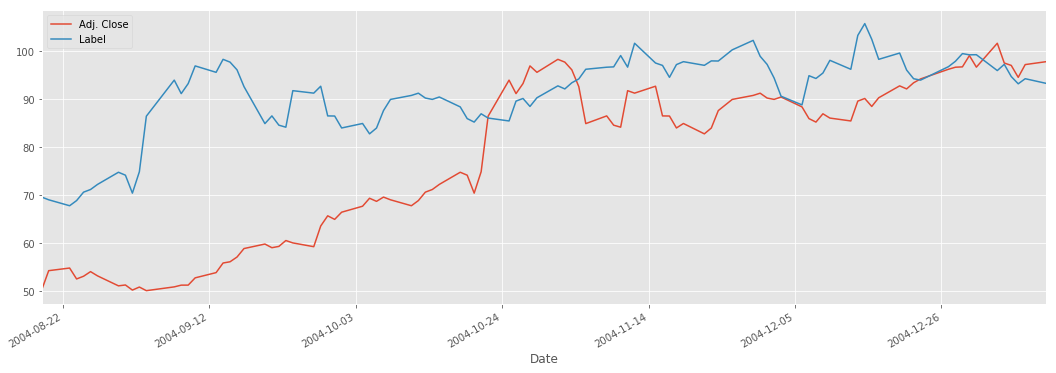

In [18]:
tmp=df[['Adj. Close','Label']]
tmp[:100].plot(figsize=(18,6))
plt.show()

In [19]:
X_train,X_test,y_train,y_test=cross_validation.train_test_split(X,y,test_size=0.2)

In [20]:
clf=LinearRegression()
clf.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [30]:
forecast_set=clf.predict(X_lately)
y_pred_lr=clf.predict(X_test)
len(X_lately),len(X_test),len(y_test),len(X_train),len(forecast_set)

(34, 670, 670, 2676, 34)

In [25]:
df['Forecast']=np.nan
df.tail()

,Volume,Adj. Close,HL_PCT,PCT_change,Label,Forecast
Date,,,,,,
2017-11-27,1708195.0,1072.01,1.704275,1.269637,1139.10,NaN
2017-11-28,1694098.0,1063.29,2.394455,-0.996285,1135.97,NaN
2017-11-29,2737664.0,1037.38,2.807072,-1.780000,1143.50,NaN
2017-11-30,2190379.0,1036.17,1.357885,-0.362521,1164.16,NaN
2017-12-01,1850541.0,1025.07,1.984255,-0.518240,1176.17,NaN


In [26]:
last_date=df.iloc[-1].name
last_date

Timestamp('2017-12-01 00:00:00')

In [27]:
one_day=86400 #minutes
last_day=last_date.timestamp()
next_day=last_day+one_day

In [28]:
for i in forecast_set:
    next_date=datetime.datetime.fromtimestamp(next_day)
    next_day+=86400
    df.loc[next_date]=[np.nan for j in range(len(df.columns)-1)]+[i]

In [29]:
df.tail()

,Volume,Adj. Close,HL_PCT,PCT_change,Label,Forecast
Date,,,,,,
2017-12-31,NaN,NaN,NaN,NaN,NaN,1151.884872
2018-01-01,NaN,NaN,NaN,NaN,NaN,1148.592470
2018-01-02,NaN,NaN,NaN,NaN,NaN,1156.660465
2018-01-03,NaN,NaN,NaN,NaN,NaN,1176.314117
2018-01-04,NaN,NaN,NaN,NaN,NaN,1188.702655


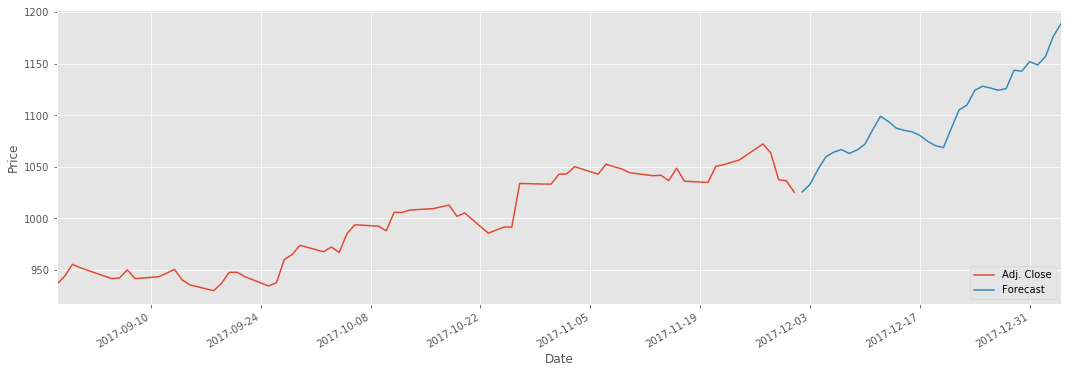

In [31]:
df[['Adj. Close','Forecast']][-100:].plot(figsize=(18,6))
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [32]:
accuracy=clf.score(X_test,y_test)
accuracy*100

97.61672391124921

In [34]:
LR_RMSE = np.sqrt(mean_squared_error(y_true=y_test,y_pred=y_pred_lr))
print('Linear Regression :',LR_RMSE)

Linear Regression : 37.5554849071
